# "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."

## Business and data understanding

**Problem Statement:** Identify fans that are most likely to defect, i.e. not renew their season tickets so that your business team can intervene and attempt to retain those fans. 

By building a prediction model that corresponds to the likehood of fans not renewing their season tickets, you will be able to identify the fans that are risk. Business can gain insight and learn how to retain future and current season ticket holders. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from scipy import stats

#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import svm
from sklearn.neural_network import MLPClassifier


#ensemble classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm

from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV 
from sklearn import metrics
from sklearn.metrics import roc_auc_score, auc

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

# recursive feature selection (feature selection)
from sklearn.feature_selection import RFE


import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
import statsmodels.formula.api as sm

#lasso regression
from sklearn import linear_model

/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#to read excel file
df=pd.read_excel("data/train_test_dataset.xlsx")
df.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94,4,NaN,0,1,NaN,,77,203
1,298S54OK,1,0,0,1,0,1,15,3,1,,,NaN,0,0,NaN,1,53,68
2,268D25AO,1,1,0,0,0,1,15,11,1,67,2,NaN,0,1,0.0,,50,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62,4,,1,1,0.0,1,60,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89,4,,1,1,0.0,,65,194


## Data Processing (ETL)

In [3]:
# find out some statistics about the dataset
df.describe()

,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,SPORT,PCTMARR,HOMEVAL
count,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,4273.000000,9216.000000,9216.000000
mean,0.500000,0.337023,0.510525,0.636719,0.291124,0.480252,19.963108,6.378038,0.489475,0.056869,58.228516,112.111220
std,0.500027,0.472718,0.499916,0.480971,0.454305,0.499637,8.820188,2.873927,0.499916,0.250085,12.902173,92.292223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,4.000000,0.000000,0.000000,52.000000,56.000000
50%,0.500000,0.000000,1.000000,1.000000,0.000000,0.000000,15.000000,6.000000,0.000000,0.000000,61.000000,81.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,25.000000,9.000000,1.000000,0.000000,67.000000,132.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,50.000000,24.000000,1.000000,3.000000,99.000000,600.000000


In [4]:
#find out the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 19 columns):
FAKEID      9216 non-null object
Y2defect    9216 non-null int64
Y1G5        9216 non-null int64
Y1G4        9216 non-null int64
Y1G3        9216 non-null int64
Y1G2        9216 non-null int64
Y1G1        9216 non-null int64
Y1price     9216 non-null int64
YEARS       9216 non-null int64
BACKER      9216 non-null int64
AGE         9216 non-null object
INCOME      9216 non-null object
CHILD       4549 non-null object
GNDR        9216 non-null object
OWNHOME     9216 non-null object
SPORT       4273 non-null float64
COMP        9216 non-null object
PCTMARR     9216 non-null int64
HOMEVAL     9216 non-null int64
dtypes: float64(1), int64(11), object(7)
memory usage: 1.3+ MB


There are a number of **data quality issues**.
- There are two columns that have missing values
- There are some missing values and empty cells in the dataset

**Numerical Columns**: Y2defect, Y1G5, Y1G4, Y1G3, Y1G2, Y1G1, Y1price, Years, Backer, Sport, Pctmarr, and Homeval

**Categorical Columns**: Fakeid, Age, Income, Child, Gndr, Ownhome, and Comp

In [5]:
# find out how many missing values in each column or variable
df.isnull().sum()

FAKEID         0
Y2defect       0
Y1G5           0
Y1G4           0
Y1G3           0
Y1G2           0
Y1G1           0
Y1price        0
YEARS          0
BACKER         0
AGE            0
INCOME         0
CHILD       4667
GNDR           0
OWNHOME        0
SPORT       4943
COMP           0
PCTMARR        0
HOMEVAL        0
dtype: int64

The columns "Child" and "Sport" have missing values.

In [6]:
#to replace empty values with null value
df = df.replace(r'\s+', np.nan, regex=True)
df.head(10)

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94.0,4.0,NaN,0.0,1.0,NaN,NaN,77,203
1,298S54OK,1,0,0,1,0,1,15,3,1,NaN,NaN,NaN,0.0,0.0,NaN,1.0,53,68
2,268D25AO,1,1,0,0,0,1,15,11,1,67.0,2.0,NaN,0.0,1.0,0.0,NaN,50,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62.0,4.0,NaN,1.0,1.0,0.0,1.0,60,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89.0,4.0,NaN,1.0,1.0,0.0,NaN,65,194
5,611B52LL,1,0,0,1,0,0,15,2,0,77.0,0.0,NaN,0.0,NaN,0.0,NaN,54,92
6,612W26VA,1,0,1,0,0,0,15,4,0,67.0,1.0,1.0,1.0,NaN,NaN,NaN,63,129
7,594Y59EZ,0,1,1,0,0,1,15,6,1,76.0,5.0,NaN,1.0,1.0,0.0,NaN,50,483
8,610K33YD,1,1,0,0,0,1,25,4,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,51,168
9,716W84WL,1,0,1,1,0,0,15,3,1,54.0,3.0,NaN,0.0,NaN,NaN,NaN,51,90


In [7]:
df.isnull().sum()

FAKEID         0
Y2defect       0
Y1G5           0
Y1G4           0
Y1G3           0
Y1G2           0
Y1G1           0
Y1price        0
YEARS          0
BACKER         0
AGE         1993
INCOME      1944
CHILD       8634
GNDR         498
OWNHOME     1999
SPORT       4943
COMP        8207
PCTMARR        0
HOMEVAL        0
dtype: int64

Now, Child and Sport are not the only columns with missing values.

Comp and Child have over 8,000 missing values. Should we drop all the missing values or replace them with another value? Are there columns that are not relevant for finding the defects? 

In [8]:
#To drop unwanted columns
df = df.drop(['COMP','CHILD','SPORT', 'PCTMARR'], axis=1)
df.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,OWNHOME,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94.0,4.0,0.0,1.0,203
1,298S54OK,1,0,0,1,0,1,15,3,1,NaN,NaN,0.0,0.0,68
2,268D25AO,1,1,0,0,0,1,15,11,1,67.0,2.0,0.0,1.0,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62.0,4.0,1.0,1.0,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89.0,4.0,1.0,1.0,194


In [9]:
df.isnull().sum()

FAKEID         0
Y2defect       0
Y1G5           0
Y1G4           0
Y1G3           0
Y1G2           0
Y1G1           0
Y1price        0
YEARS          0
BACKER         0
AGE         1993
INCOME      1944
GNDR         498
OWNHOME     1999
HOMEVAL        0
dtype: int64

In [10]:
#To find the median value of a column
df['AGE'].median()

63.0

In [11]:
df['INCOME'].median()

3.0

In [12]:
df['OWNHOME'].median()

1.0

In [13]:
#To replace the null values with the median value
df = df.fillna({'AGE': 63.})
df = df.fillna({'INCOME': 3})
df = df.fillna({'OWNHOME': 1})
df.isnull().sum()

FAKEID        0
Y2defect      0
Y1G5          0
Y1G4          0
Y1G3          0
Y1G2          0
Y1G1          0
Y1price       0
YEARS         0
BACKER        0
AGE           0
INCOME        0
GNDR        498
OWNHOME       0
HOMEVAL       0
dtype: int64

In [14]:
df = df.dropna()
df.isnull().sum()

FAKEID      0
Y2defect    0
Y1G5        0
Y1G4        0
Y1G3        0
Y1G2        0
Y1G1        0
Y1price     0
YEARS       0
BACKER      0
AGE         0
INCOME      0
GNDR        0
OWNHOME     0
HOMEVAL     0
dtype: int64

In [15]:
#to change categorical values into numerical columns
df['AGE'] = df['AGE'].astype(int)
df['INCOME'] = df['INCOME'].astype(int)
df['GNDR'] = df['GNDR'].astype(int)
df['OWNHOME'] = df['OWNHOME'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8718 entries, 0 to 9215
Data columns (total 15 columns):
FAKEID      8718 non-null object
Y2defect    8718 non-null int64
Y1G5        8718 non-null int64
Y1G4        8718 non-null int64
Y1G3        8718 non-null int64
Y1G2        8718 non-null int64
Y1G1        8718 non-null int64
Y1price     8718 non-null int64
YEARS       8718 non-null int64
BACKER      8718 non-null int64
AGE         8718 non-null int64
INCOME      8718 non-null int64
GNDR        8718 non-null int64
OWNHOME     8718 non-null int64
HOMEVAL     8718 non-null int64
dtypes: int64(14), object(1)
memory usage: 1.1+ MB


In [16]:
#To create a new column from existing columns
#The number of tickets used for Year 1 per season ticket holder
df['TICKUTIL'] = df['Y1G5'] + df['Y1G4'] + df['Y1G3'] + df['Y1G2'] + df['Y1G1']
df.head(10)

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,OWNHOME,HOMEVAL,TICKUTIL
0,580V74KT,0,0,0,1,1,1,15,8,1,94,4,0,1,203,3
1,298S54OK,1,0,0,1,0,1,15,3,1,63,3,0,0,68,2
2,268D25AO,1,1,0,0,0,1,15,11,1,67,2,0,1,38,2
3,312Q12WV,1,1,0,1,0,1,15,4,0,62,4,1,1,68,3
4,420R23VB,0,0,0,1,0,0,15,5,0,89,4,1,1,194,1
5,611B52LL,1,0,0,1,0,0,15,2,0,77,0,0,1,92,1
6,612W26VA,1,0,1,0,0,0,15,4,0,67,1,1,1,129,1
7,594Y59EZ,0,1,1,0,0,1,15,6,1,76,5,1,1,483,3
9,716W84WL,1,0,1,1,0,0,15,3,1,54,3,0,1,90,2
10,912U90JS,1,0,0,0,0,1,25,6,0,82,0,1,1,122,1


## Data Visualization

In [17]:
# pivot table for Y2defect showing mean value, 1=did not renew 0=did renew
df.groupby(['Y2defect']).mean()

,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,OWNHOME,HOMEVAL,TICKUTIL
Y2defect,,,,,,,,,,,,,,
0,0.387807,0.499427,0.655054,0.338758,0.552143,20.146688,6.754985,0.580335,61.956223,2.892505,0.443044,0.807701,108.811827,2.433188
1,0.289323,0.527440,0.620436,0.238576,0.407348,19.765786,5.949024,0.391045,61.360505,2.927210,0.451435,0.794030,114.660161,2.083123


Likely to defect: 
- Are not backers of the team
- Have high home values
- Had slightly less years a season ticket holder

In [18]:
# pivot table using both Y2defect and BACKER
df.groupby(['Y2defect', 'BACKER']).count()

FAKEID  Y1G5  Y1G4  Y1G3  Y1G2  Y1G1  Y1price  YEARS   AGE  \
Y2defect BACKER                                                               
0        0         1831  1831  1831  1831  1831  1831     1831   1831  1831   
         1         2532  2532  2532  2532  2532  2532     2532   2532  2532   
1        0         2652  2652  2652  2652  2652  2652     2652   2652  2652   
         1         1703  1703  1703  1703  1703  1703     1703   1703  1703   

                 INCOME  GNDR  OWNHOME  HOMEVAL  TICKUTIL  
Y2defect BACKER                                            
0        0         1831  1831     1831     1831      1831  
         1         2532  2532     2532     2532      2532  
1        0         2652  2652     2652     2652      2652  
         1         1703  1703     1703     1703      1703

In [19]:
# pivot table using both Y2defect and INCOME
df.groupby(['Y2defect', 'TICKUTIL']).mean()

Y1G5      Y1G4      Y1G3      Y1G2      Y1G1  \
Y2defect TICKUTIL                                                     
0        1         0.100320  0.175027  0.479189  0.059765  0.185699   
         2         0.274604  0.465244  0.622849  0.192017  0.445286   
         3         0.491566  0.577510  0.714859  0.477108  0.738956   
         4         0.765781  0.820598  0.810631  0.702658  0.900332   
         5         1.000000  1.000000  1.000000  1.000000  1.000000   
1        1         0.062031  0.244717  0.475119  0.057260  0.160873   
         2         0.185741  0.612258  0.660413  0.184490  0.357098   
         3         0.586248  0.669481  0.669481  0.400483  0.674306   
         4         0.805263  0.852632  0.826316  0.652632  0.863158   
         5         1.000000  1.000000  1.000000  1.000000  1.000000   

                     Y1price     YEARS    BACKER        AGE    INCOME  \
Y2defect TICKUTIL                                                       
0        1         19.850587  6.237994  0.454642  61.008538  2.897545   
         2         20.474880  6.501721  0.533379  61.671025  2.909842   
         3         20.309237  7.059438  0.646586  62.616064  2.896386   
         4         19.717608  7.322259  0.705980  62.284053  2.827243   
         5         19.007937  7.801587  0.801587  64.206349  2.928571   
1        1         19.355828  5.259714  0.289025  60.750511  2.920927   
         2         19.646654  5.657286  0.363352  60.731082  2.916823   
         3         20.379976  6.973462  0.527141  62.864897  2.979493   
         4         20.315789  7.144737  0.539474  62.294737  2.921053   
         5         20.687500  8.125000  0.700000  65.100000  2.737500   

                       GNDR   OWNHOME     HOMEVAL  
Y2defect TICKUTIL                                  
0        1         0.455710  0.801494  109.980790  
         2         0.465244  0.814178  108.094288  
         3         0.417671  0.811245  110.964659  
         4         0.436877  0.800664  105.872093  
         5         0.373016  0.777778  101.166667  
1        1         0.458078  0.788003  114.113838  
         2         0.436523  0.791745  114.438399  
         3         0.482509  0.805790  116.646562  
         4         0.431579  0.807895  112.402632  
         5         0.400000  0.762500  119.250000

In [20]:
# pivot table using both Y2defect and Y1price
df.groupby(['Y2defect', 'Y1price']).mean()

Y1G5      Y1G4      Y1G3      Y1G2      Y1G1     YEARS  \
Y2defect Y1price                                                               
0        15       0.375175  0.495105  0.679021  0.331469  0.571678  6.758392   
         25       0.412106  0.511609  0.605307  0.345771  0.509950  6.659204   
         50       0.410774  0.491582  0.626263  0.380471  0.535354  7.111111   
1        15       0.270687  0.531557  0.636396  0.205470  0.400421  5.827840   
         25       0.319466  0.520408  0.598116  0.295133  0.416013  6.127159   
         50       0.353712  0.515284  0.545852  0.336245  0.445415  6.467249   

                    BACKER        AGE    INCOME      GNDR   OWNHOME  \
Y2defect Y1price                                                      
0        15       0.646154  62.781469  2.772727  0.426923  0.815734   
         25       0.452736  60.243781  3.093698  0.470149  0.802653   
         50       0.464646  60.962963  3.228956  0.488215  0.750842   
1        15       0.415498  61.738429  2.875877  0.438289  0.791374   
         25       0.339874  60.374411  2.996860  0.463108  0.797488   
         50       0.371179  62.139738  3.179039  0.550218  0.807860   

                     HOMEVAL  TICKUTIL  
Y2defect Y1price                        
0        15       102.384266  2.452448  
         25       119.277778  2.384743  
         50       128.208754  2.444444  
1        15       108.270687  2.044530  
         25       124.394035  2.149137  
         50       140.082969  2.196507

In [21]:
df.pivot_table(index=['Y2defect'], columns=['INCOME'])

AGE                                                         \
INCOME            0          1          2          3          4          5   
Y2defect                                                                     
0         68.065574  67.628125  61.455607  61.201868  58.946545  58.879679   
1         68.821429  65.550580  61.045113  60.994524  58.305221  57.676471   

                       BACKER                        ...       Y1price  \
INCOME            6         0         1         2    ...             4   
Y2defect                                             ...                 
0         57.432836  0.637002  0.635938  0.598131    ...     20.788787   
1         57.544160  0.469048  0.446103  0.428571    ...     19.330656   

                                   YEARS                                \
INCOME            5          6         0         1         2         3   
Y2defect                                                                 
0         21.136364  21.537313  7.147541  7.176563  6.754673  6.770833   
1         21.096257  21.068376  6.607143  6.371476  6.152882  5.734428   

                                        
INCOME           4         5         6  
Y2defect                                
0         6.385919  6.518717  6.492537  
1         5.617135  5.997326  5.752137  

[2 rows x 91 columns]

- Season ticket holders that have a lower income and are older, are likely to not renew for next year. 
- Season ticket holders that have low income and are not backers of the team are likely to not renew for the next year.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c131d1410>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1c18e19b10>]], dtype=object)

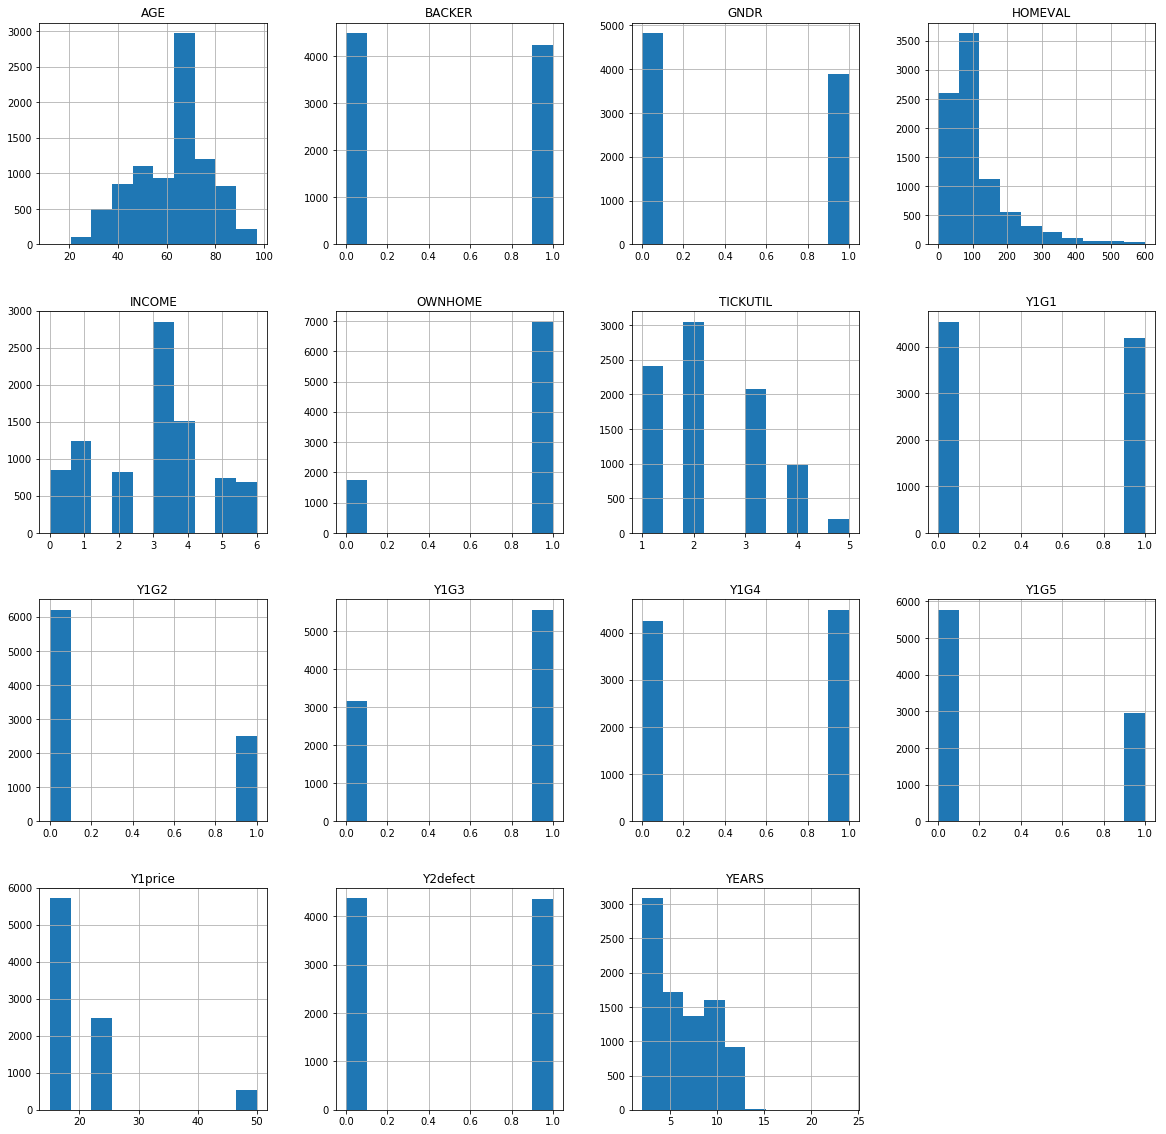

In [22]:
# histogram for all numerical columns
df.hist(figsize=(20,20))

Y2defect
0    [[AxesSubplot(0.125,0.725918;0.158163x0.154082...
1    [[AxesSubplot(0.125,0.725918;0.158163x0.154082...
dtype: object

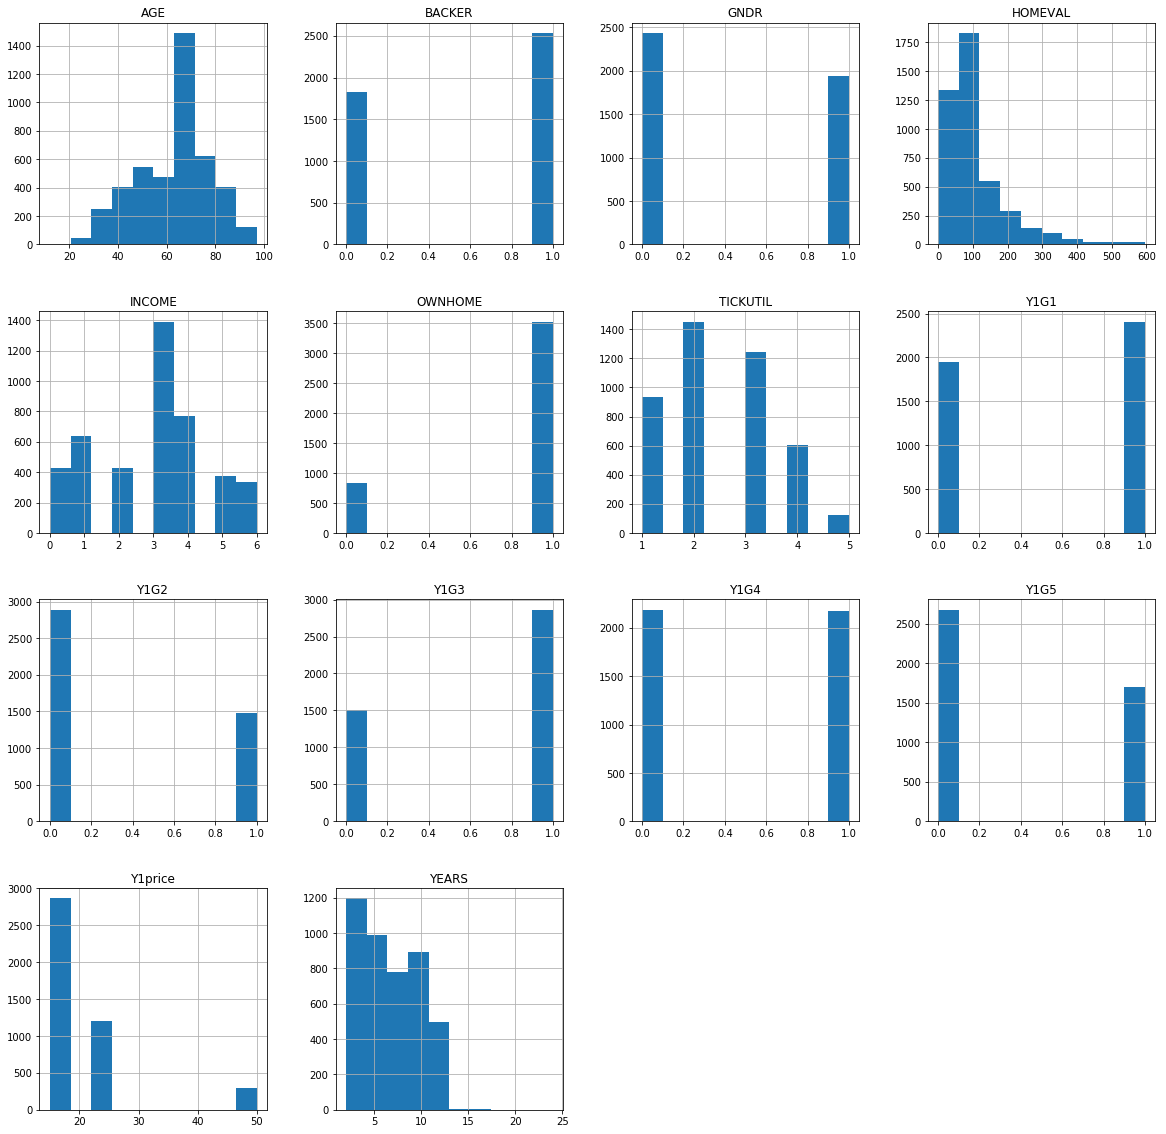

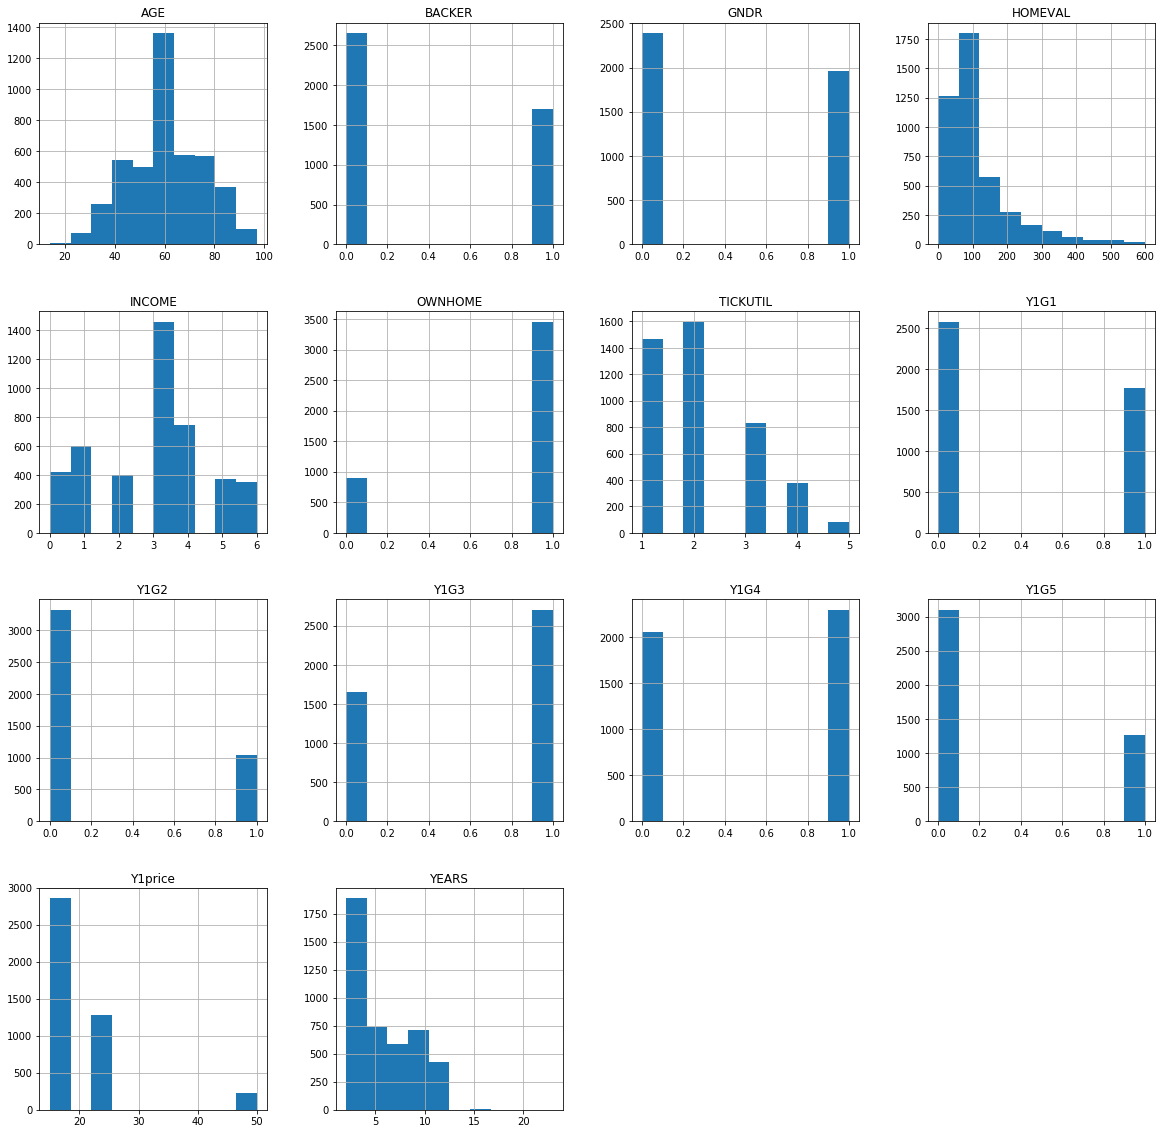

In [23]:
#Histogram with Groupby
df.groupby('Y2defect').hist(figsize=(20,20))

#Figure 1: those who did renew; Figure 2: those who did not renew

Very similar in both figures

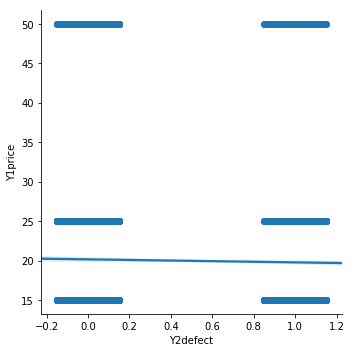

In [24]:
# linear regression & scatter chart for Y2defect and Y1price
sns.lmplot("Y2defect", "Y1price", df , x_jitter=.15)

People who paid for a lower ticket price are most likely to not renew for the next year.

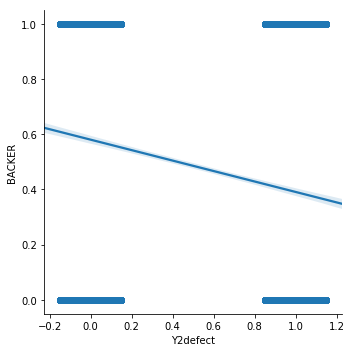

In [25]:
# linear regression & scatter chart for Y2defect and BACKER
sns.lmplot("Y2defect", "BACKER", df , x_jitter=.15)

Season ticket holders that are backers are most likely to renew for the next year

## Exploratory Data Analysis

In [26]:
#To find some basic statistics about the dataset
df.describe()

,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,OWNHOME,HOMEVAL,TICKUTIL
count,8718.000000,8718.000000,8718.000000,8718.000000,8718.000000,8718.000000,8718.000000,8718.000000,8718.000000,8718.000000,8718.000000,8718.000000,8718.000000,8718.000000,8718.000000
mean,0.499541,0.338610,0.513421,0.637761,0.288713,0.479812,19.956412,6.352374,0.485777,61.658637,2.909842,0.447236,0.800872,111.733310,2.258316
std,0.500028,0.473264,0.499849,0.480675,0.453190,0.499621,8.820436,2.872007,0.499826,14.828058,1.660365,0.497237,0.399368,92.143323,1.053696
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,2.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,4.000000,0.000000,51.000000,2.000000,0.000000,1.000000,55.000000,1.000000
50%,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,15.000000,6.000000,0.000000,63.000000,3.000000,0.000000,1.000000,80.000000,2.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,25.000000,9.000000,1.000000,72.000000,4.000000,1.000000,1.000000,132.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,50.000000,24.000000,1.000000,97.000000,6.000000,1.000000,1.000000,600.000000,5.000000


In [27]:
# correlation analysis
df.corr()

,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,OWNHOME,HOMEVAL,TICKUTIL
Y2defect,1.000000,-0.104053,0.028023,-0.036011,-0.110535,-0.144913,-0.021593,-0.140321,-0.189366,-0.020089,0.010452,0.008438,-0.017117,0.031737,-0.166122
Y1G5,-0.104053,1.000000,0.090870,-0.151624,0.113242,0.122065,0.041598,0.123376,0.047036,0.030646,0.001043,-0.008892,0.013248,0.002908,0.529669
Y1G4,0.028023,0.090870,1.000000,-0.080509,-0.073067,-0.093543,-0.003770,-0.089599,-0.088774,-0.063692,0.006849,-0.002689,0.039249,0.002141,0.402683
Y1G3,-0.036011,-0.151624,-0.080509,1.000000,-0.090708,-0.137456,-0.047423,-0.099819,0.006247,-0.025560,0.019158,-0.001742,-0.035167,0.003211,0.245697
Y1G2,-0.110535,0.113242,-0.073067,-0.090708,1.000000,0.207887,0.060402,0.320920,0.277685,0.094220,-0.011293,-0.005443,-0.000503,-0.015342,0.503490
Y1G1,-0.144913,0.122065,-0.093543,-0.137456,0.207887,1.000000,-0.003844,0.245281,0.259089,0.084670,-0.028331,-0.026223,-0.004626,-0.012690,0.511318
Y1price,-0.021593,0.041598,-0.003770,-0.047423,0.060402,-0.003844,1.000000,0.043650,-0.088352,-0.032278,0.068938,0.045249,-0.015816,0.091856,0.019418
YEARS,-0.140321,0.123376,-0.089599,-0.099819,0.320920,0.245281,0.043650,1.000000,0.532929,0.283154,-0.088194,-0.013408,0.002173,-0.047321,0.221704
BACKER,-0.189366,0.047036,-0.088774,0.006247,0.277685,0.259089,-0.088352,0.532929,1.000000,0.180273,-0.085729,-0.024022,-0.009018,-0.065270,0.224144
AGE,-0.020089,0.030646,-0.063692,-0.025560,0.094220,0.084670,-0.032278,0.283154,0.180273,1.000000,-0.221130,0.018002,-0.055513,-0.010786,0.052562


- Y1G2 is positively correlated with Years
- Years and Backer are positively correlated
- Y1G1 through Y1G5 are positively correlated
- Y2defect not significantly correlated with other variables

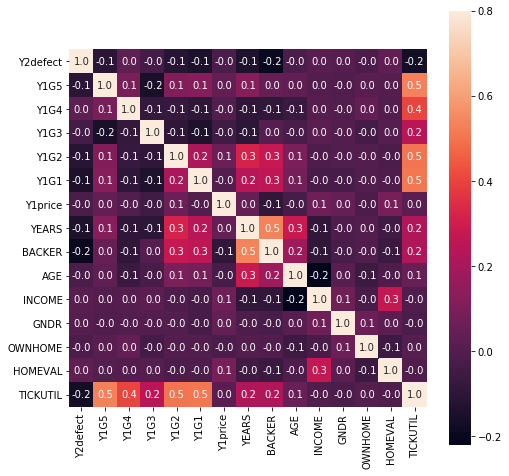

In [28]:
# To make a heatmap of the correlation results
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), vmax=.8, square=True, annot=True, fmt=".1f")

In [29]:
# find out correlation of two columns: BACKER, YEARS
df[['BACKER','YEARS']].corr()

,BACKER,YEARS
BACKER,1.000000,0.532929
YEARS,0.532929,1.000000


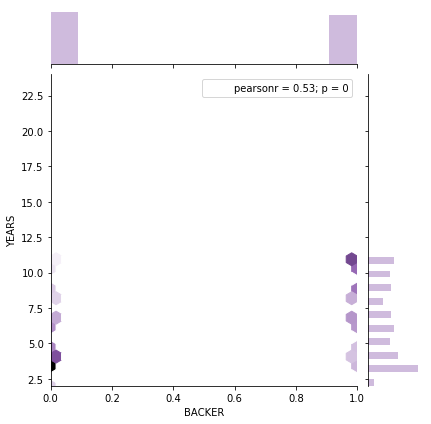

In [30]:
sns.jointplot("BACKER", "YEARS", df, kind="hex", color="#8855AA")

- There is a **meaningful correlation** between the two variables

### 2-Sample Test

**Null Hypothesis:**There is no difference between female and male in terms of season ticket holders renewing and not renewing for the next year. 

In [31]:
#Perform a T-Test
female_holder = df[df['GNDR'] == 0]['Y2defect']
male_holder = df[df['GNDR'] == 1]['Y2defect']
stats.ttest_ind(female_holder, male_holder)

Ttest_indResult(statistic=-0.78783952348241204, pvalue=0.43081200374778916)

In [32]:
#print three decimal points
two_sample = stats.ttest_ind(female_holder, male_holder)
print "The t-statistic is %.3f and the p-value is %.3f." % two_sample

The t-statistic is -0.788 and the p-value is 0.431.


- Null hypothesis says two means are almost same.
- p-value is a probability if the null hypothesis is true. A low p-value (< 0.01) means we can reject the null hypothesis
- Since we have a high p-value, we accept the null hypothesis that there is no significant difference between male and female ticket holders in defecting and not defecting(No difference)

/anaconda2/lib/python2.7/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


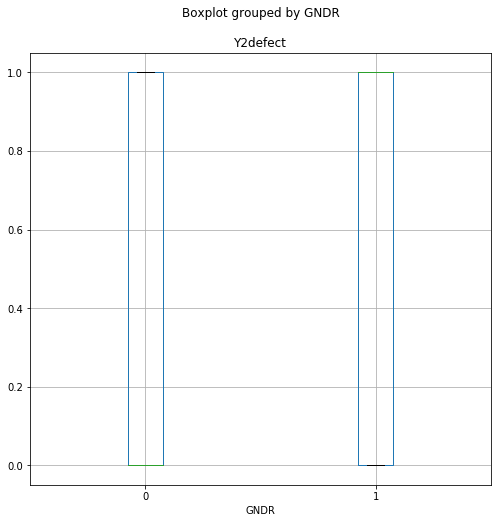

In [33]:
#Create a boxplot
df.boxplot('Y2defect', by='GNDR', figsize=(8, 8))

**Null Hypothesis:**There is a significant difference between those who are members of the team's "backer" club and those who are not in terms of defecting or not defecting. 

In [34]:
Backer_Y = df[df['BACKER'] == 1]['Y2defect']
Backer_N = df[df['BACKER'] == 0]['Y2defect']
stats.ttest_ind(Backer_Y, Backer_N)

Ttest_indResult(statistic=-18.004929656148811, pvalue=3.4388109465393212e-71)

In [35]:
two_sample = stats.ttest_ind(Backer_Y, Backer_N)
print "The t-statistic is %.3f and the p-value is %.3f." % two_sample

The t-statistic is -18.005 and the p-value is 0.000.


- Null hypothesis says two means are almost same.
- p-value is a probability if the null hypothesis is true. A low p-value (< 0.01) means we can reject the null hypothesis
- Since we have a very low p-value, we reject the null hypothesis of there is no significant difference between those who are members and not members of team's backer club who defect or do not defect. 

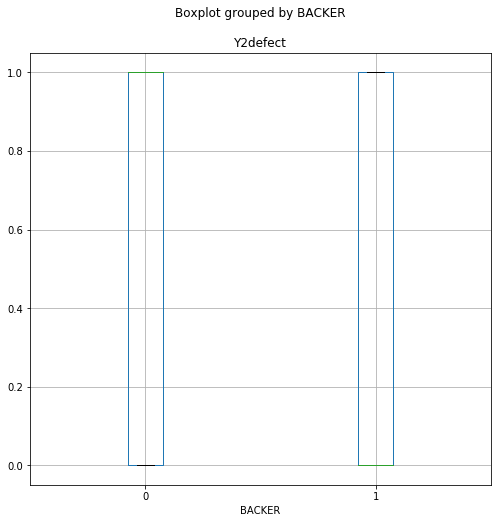

In [36]:
df.boxplot('Y2defect', by='BACKER', figsize=(8, 8))

### ANOVA

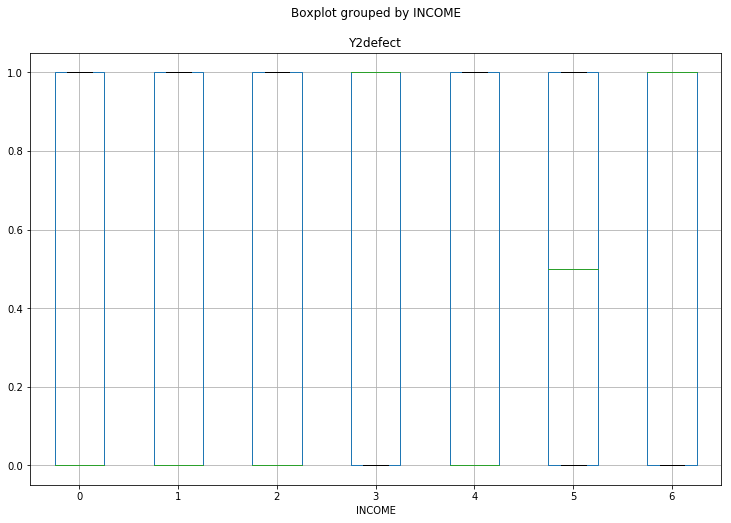

In [37]:
# Display a boxplot of two columns
df.boxplot('Y2defect', by='INCOME', figsize=(12, 8))

In [38]:
# To test differences more than three samples or groups
low = df[df['INCOME'] == 0]['Y2defect']
med_low = df[df['INCOME'] == 1]['Y2defect']
high_low = df[df['INCOME'] == 2]['Y2defect']
med = df[df['INCOME'] == 3]['Y2defect']
med_med = df[df['INCOME'] == 4]['Y2defect']
high_med = df[df['INCOME'] == 5]['Y2defect']
high = df[df['INCOME'] == 6]['Y2defect']

f_val, p_val = stats.f_oneway(low, med_low, high_low, med, med_med, high_med, high)  
  
print "One-way ANOVA P =", p_val  

One-way ANOVA P = 0.612871457095


There is no significant difference between types of income

In [39]:
# ANOVA test using the python package "statsmodels"
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('Y2defect ~ INCOME', data=df).fit()
                
aov_table = sm.stats.anova_lm(mod)
print aov_table

              df       sum_sq   mean_sq         F    PR(>F)
INCOME       1.0     0.238079  0.238079  0.952203  0.329186
Residual  8716.0  2179.260086  0.250030       NaN       NaN


/anaconda2/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda2/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda2/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


The p-value is very high, meaning there is no significant difference of people who defect or do not defect with different incomes.  

## Model Building

In [40]:
df = df.drop(['FAKEID'], axis=1)
df.head()

,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,OWNHOME,HOMEVAL,TICKUTIL
0,0,0,0,1,1,1,15,8,1,94,4,0,1,203,3
1,1,0,0,1,0,1,15,3,1,63,3,0,0,68,2
2,1,1,0,0,0,1,15,11,1,67,2,0,1,38,2
3,1,1,0,1,0,1,15,4,0,62,4,1,1,68,3
4,0,0,0,1,0,0,15,5,0,89,4,1,1,194,1


### Decision Tree Classifier

In [41]:
y = df['Y2defect']
X = df[['BACKER', 'OWNHOME', 'TICKUTIL', 'Y1G2', 'Y1G1']]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [43]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [44]:
#Model evaluation
print metrics.accuracy_score(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.classification_report(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.roc_auc_score(y_test, dt.predict(X_test))

# y-test is the acual y value in the testing dataset
# dt.predict(X_test) is the y value generated by the model
    #compare actual vs predicted y value
# If they are same, we can say the model is accurate.
# Evaluate our model with testing
    #build model with training set but test our model with testing data set

0.62003058104
--------------------------------------------------------
[[945 355]
 [639 677]]
--------------------------------------------------------
             precision    recall  f1-score   support

          0       0.60      0.73      0.66      1300
          1       0.66      0.51      0.58      1316

avg / total       0.63      0.62      0.62      2616

--------------------------------------------------------
0.620680383446


The decision tree model has a **62.0%** accuracy

### K-Nearest Neighbor

In [45]:
# declare X variables and y variable
y = df['Y2defect']
X = df.drop(['Y2defect'], axis=1)

In [46]:
# evaluate the model by splitting into train and test sets & develop knn model (name it as knn)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
knn = KNeighborsClassifier()    #  n_neighbors=5 by default
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [47]:
#Model evaluation without valdation
print metrics.accuracy_score(y_test, knn.predict(X_test))
print metrics.confusion_matrix(y_test, knn.predict(X_test))
print metrics.classification_report(y_test, knn.predict(X_test))
print metrics.roc_auc_score(y_test, knn.predict(X_test))

0.540137614679
[[715 585]
 [618 698]]
             precision    recall  f1-score   support

          0       0.54      0.55      0.54      1300
          1       0.54      0.53      0.54      1316

avg / total       0.54      0.54      0.54      2616

0.540197568389


This model has a **54.01%** accuracy

### Linear Regression

In [48]:
#declare X variables and y variable
y = df['Y2defect']
X = df.drop(['Y2defect', 'GNDR', 'Y1G5', 'Y1G4', 'Y1G3'], axis=1)

In [49]:
X.head(2)

,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,OWNHOME,HOMEVAL,TICKUTIL
0,1,1,15,8,1,94,4,1,203,3
1,0,1,15,3,1,63,3,0,68,2


In [50]:
# evaluate the model by splitting into train and test sets and build a logistic regression model
# name it as "lr"
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [51]:
#Model evaluation
print metrics.accuracy_score(y_test, lr.predict(X_test))
print metrics.confusion_matrix(y_test, lr.predict(X_test))
print metrics.classification_report(y_test, lr.predict(X_test))
print metrics.roc_auc_score(y_test, lr.predict(X_test))

0.612003058104
[[810 490]
 [525 791]]
             precision    recall  f1-score   support

          0       0.61      0.62      0.61      1300
          1       0.62      0.60      0.61      1316

avg / total       0.61      0.61      0.61      2616

0.612070376432


The model has a **61.2%** accuracy

# Model Selection and Evaluation

### 10-Fold Cross Validation

In [52]:
# evaluate the decision tree model using 10-fold cross-validation
scores = cross_val_score(dt, X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()

[ 0.51088202  0.54066438  0.56815578  0.54701835  0.55045872  0.5717566
  0.60045924  0.56946039  0.5510907   0.55223881]
0.556218498115


The overall Decision Tree algorithm accuracy is **55.5%**

In [53]:
# evaluate the knn model using 10-fold cross-validation
scores = cross_val_score(knn, X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()

[ 0.51890034  0.51660939  0.5486827   0.52178899  0.52408257  0.5304248
  0.53960964  0.55223881  0.50861079  0.52353617]
0.528448420615


The overall K-Nearest Neighbor accuracy is **53.02%**

In [54]:
# evaluate the logistics regression model using 10-fold cross-validation
scores = cross_val_score(lr, X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()

[ 0.58648339  0.604811    0.62542955  0.59059633  0.5733945   0.58897819
  0.58668197  0.5924225   0.59586682  0.6130884 ]
0.595775265361


The overall Logistic Regression accuracy is **59.8%**

### ROC and AUC Score

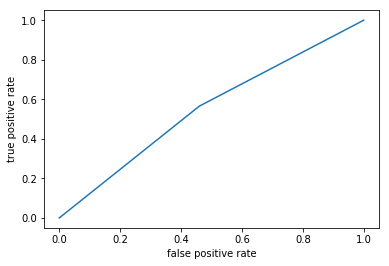

False-positive rate: [ 0.    0.46  1.  ]
True-positive rate:  [ 0.          0.56534954  1.        ]
AUC score:  0.552674772036


In [55]:
#Evaluate the Decision Tree model
y = df['Y2defect']
X = df.drop(['Y2defect'], axis=1)

# evaluate the model by splitting into train (70%) and test sets (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

#This is ROC chart based on the testing dataset

fpr, tpr, thresholds = metrics.roc_curve(y_test,dt.predict(X_test))
plt.subplot()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.plot(fpr, tpr)
plt.show()

print "False-positive rate:", fpr
print "True-positive rate: ", tpr
print "AUC score: ", metrics.roc_auc_score(y_test, dt.predict(X_test))

ROC chart shows a **FPR** of **46.9%**, a **TPR** of **56.5%** and an **AUC** of **54.8%**

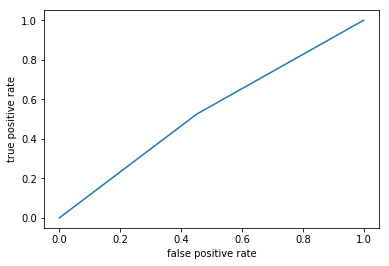

False-positive rate: [ 0.          0.45153846  1.        ]
True-positive rate:  [ 0.          0.52507599  1.        ]
AUC score:  0.536768763152


In [56]:
# Evaluate the K-Nearest Neighbor model 
y = df['Y2defect']
X = df.drop(['Y2defect'], axis=1)

# evaluate the model by splitting into train (70%) and test sets (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

#This is ROC chart based on the testing dataset

fpr, tpr, thresholds = metrics.roc_curve(y_test,knn.predict(X_test))
plt.subplot()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.plot(fpr, tpr)
plt.show()

print "False-positive rate:", fpr
print "True-positive rate: ", tpr
print "AUC score: ", metrics.roc_auc_score(y_test, knn.predict(X_test))

ROC chart shows a **FPR** of **45.1%**, a **TPR** of **52.5%** and an **AUC** of **53.6%**

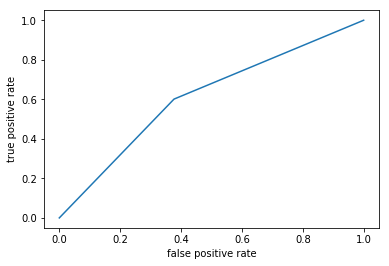

False-positive rate: [ 0.          0.37692308  1.        ]
True-positive rate:  [ 0.          0.60106383  1.        ]
AUC score:  0.612070376432


In [57]:
# Evaluate the Logistics Regression Model
y = df['Y2defect']
X = df.drop(['Y2defect', 'GNDR', 'Y1G5', 'Y1G4', 'Y1G3'], axis=1)

# evaluate the model by splitting into train (70%) and test sets (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
lr = LogisticRegression()
lr.fit(X_train, y_train)

#This is ROC chart based on the testing dataset

fpr, tpr, thresholds = metrics.roc_curve(y_test,lr.predict(X_test))
plt.subplot()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.plot(fpr, tpr)
plt.show()

print "False-positive rate:", fpr
print "True-positive rate: ", tpr
print "AUC score: ", metrics.roc_auc_score(y_test, lr.predict(X_test))

ROC chart shows a **FPR** of **37.6%**, a **TPR** of **60.1%** and an **AUC** of **61.2%**

### The best classification model to choose for predicting which season tickets holder are more likely to not renew their season tickets in the next year is the Logistic Regression Model. The Logistic Regression model had a higher accuracy in the 10-fold cross validation and AUC score. Also, it has the lowest FPR and highest TPR scores.

## Final Analysis and Storytelling

Fans likely to renew for next year: 
- More years as a ticket holder
- Is a member of the team's "backer" club
- Utilizes their tickets more (Goes to more games)
- Paid a higher price on tickets

Fans not likely to renew for next year:
- Less years as a ticket holder
- Higher in age
- Not a member of the team's "backer" club
- Paid a lower price on tickets 

Recommendations of actions for K-State Athletic Department to take: 
-  Upgrade lower priced seating (add cushions or sun shading)
- Offer incentives to fans if they renew their season tickets
- Try to increase membership in the "backer" club
- Upsell season tickets to fans who live near-by
- Add more benefits for season ticket holders (Free parking, free or discounted merchandise, opportunities to meet the team, etc.)

Additional Variables to Improve Model Prediction: 
- How far away the ticket holder lives from the team
- How far away the ticket holder works from the team
- Number of years the ticket holder has been an actual fan of the team